# Logistic Regression Sprint Challenge

Objectives:
* Create a training set and train a Logistic Regression model with it
* Predict values for $\hat{y}$ using a test set
* Calculate sum-of-squared error $SSE(y,\hat{y})$
* Calculate the error rate of a model as a percentage

Dataset: https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1

### 1. Compute Linear Regression Model

Create a training set and train a Logistic Regression model with it

In [0]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('https://www.dropbox.com/s/bnwfu81bjpf22hp/logistic_regression.csv?raw=1')
print(data.shape)
data.head()

(40, 4)


,Unnamed: 0,x1,x2,y
0,0,2.903104,3.281307,0.0
1,1,3.838055,2.758941,0.0
2,2,1.407508,1.485069,0.0
3,3,0.332565,1.473001,0.0
4,4,2.756526,2.390291,0.0


The first column appears to be an index column. I will briefly confirm whether this is the case, and if so, will drop it from the dataset.

In [3]:
print((data['Unnamed: 0'] == data.index).all())

data = data.drop('Unnamed: 0', axis=1)

True


Before being able to call [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), I will need to ensure that I have a matrix of features and a matrix of labels. Since there are only 40 samples of data, I will include 25% of them, or 10 samples, in the test set. 

This situation is not ideal because there are few enough values in the test set where it is not reliable statistically as an estimate of the model's performance, and enough samples have been removed from the training set that the optimal solution found will not perform as well as it would have given more data.

In [0]:
# Use train_test_split to create a training set
X = data[['x1', 'x2']].as_matrix()
Y = data['y'].values

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
# Create and train(fit) the model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 2. Predict values for $\hat{y}$ for the test set

In [0]:
# Predict y_hat for the test set created previously
yhat = model.predict(x_test)

### 3. Calculate SSE for the test-set

In [7]:
# Calculate SSE
sse = np.sum(np.power((yhat - y_test), 2))

# Print SSE
print('SSE:', sse)

SSE: 1.0


### 4. Calculate the error rate of the model as a percentage.

Since a misclassified point will have a $(\hat{y}-y)^2$ equal to one, the SSE is simply the count of misclassified points. The percentage error then is this count divided by the total number of points. 

In [8]:
# Calculate percentage
error = sse / len(y_test)

# Print percentage
print('Percent error: {:.0f}%'.format(error*100))

Percent error: 10%


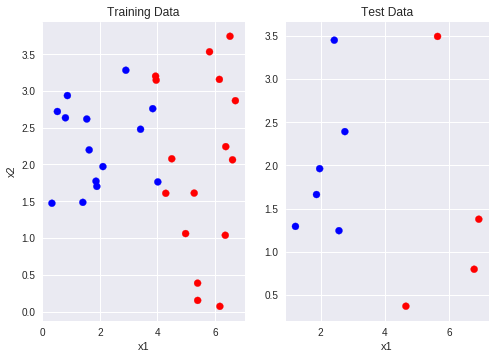

In [9]:
fig, ax = plt.subplots(1, 2)

ax[0].scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
ax[0].set(title='Training Data', ylabel='x2', xlabel='x1')
ax[1].scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='bwr')
ax[1].set(title='Test Data', xlabel='x1');

The percentage error obtained is consistent with how separable the data appears to be. With a dataset of this size however, one would expect setting different random states for the train-test split to sometimes result in different errors.